In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import json
import pickle as pkl
from skimage import io
from PIL import Image
from scipy import interpolate

In [63]:
cap_file = 'coco/annotations/captions_val2014.json'
im_dir = 'coco/images/val2014/COCO_val2014_%012d.jpg'
checkpoint_file = 'vgg_nobn.sgd.lr0.05.gamma0.05'

In [92]:
caps = json.load(open(cap_file))
id_to_image = {}
for image in caps['images']:
    id_to_image[image['id']] = image

In [172]:
def normalize_values(values):
    values = -1*values
    values -= np.min(values)
    values = values/np.max(values)
    return values

In [213]:
id = 371395

#This is what you will need to provide for this to work:
#I have a pickle file for each image which has a field 'qs' where 'qs' are the values computed
#by looking at the cross entropy loss.
#For my particular network, I had 7x7 conv features and 'qs' is a 1x49 vector.
#'qs' is squashed row-wise, so the first 7 entries correspond to the top row, 
#the second entries correspond to the second row and so on.  
#Don't asked me why I saved it this way; I don't have a good reason.

q_values = pkl.load(open('results/q_values.90000.%s/%d.p' %(checkpoint_file, id), 'rb'))
im_info = id_to_image[id]

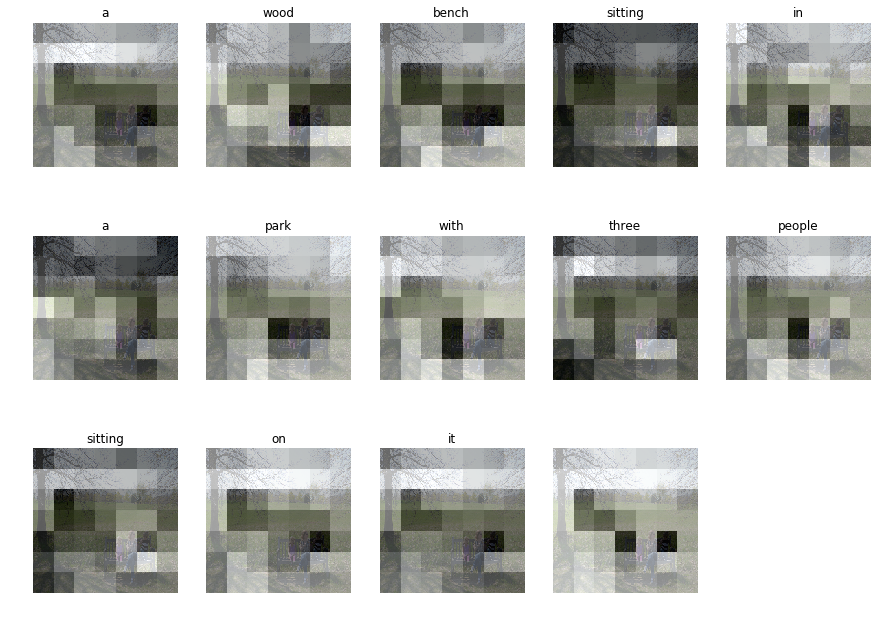

In [214]:
sentence = q_values['sentence']
len_sentence = len(sentence.split(' '))
q_value_mat = np.array(q_values['qs'])  
plt.figure(figsize=(15,15))
#q_value_mat = normalize_values(q_value_mat)

for word_idx in range(len_sentence):
    plt.subplot((len_sentence/4)+1, 4+1, word_idx+1)  #This was hand chosen based on what looked nice.

    norm_vals = (normalize_values(q_value_mat[word_idx])).reshape((7,7))  #Hard coded -- bad!
    #norm_vals = q_value_mat[word_idx].reshape((7,7))
    norm_vals = np.tile(norm_vals[..., np.newaxis], (1, 1, 3))
    norm_image = Image.fromarray(np.uint8(norm_vals*255))
    norm_image = norm_image.resize((224, 224))
    norm_image = norm_image.convert("RGBA")
    norm_image.putalpha(200)
   
    #plt.imshow(norm_image)

    image = Image.open(im_dir % im_info['id'])
    image = image.resize((224, 224))

    image.paste(norm_image, (0, 0), norm_image)
    plt.axis('off')


    plt.imshow(image)
    plt.title(sentence.split(' ')[word_idx])